In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset

In [15]:
def load_data():
    """
    Returns:
    X - training data with dimensions (n_of_features, n_of_examples)
    Y - labels (1 on the class index, -1 elsewhere) with dimensions (n_of_features, n_of_examples)
    """
    x1 = []
    x2 = []
    classes = []
    with open('tren_data1_06.txt') as f:
        for line in f:
            line = line.split()
            
            x1.append(float(line[0]))
            x2.append(float(line[1]))
            classes.append(int(float(line[2])))
    
    X = np.array([[x1, x2] for x1, x2 in zip(x1, x2)])
    
    classes = np.array(classes)
    """
    Y = np.zeros(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = 1
    """
    Y = np.ones(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = -1
    Y = -Y

    return X.T, Y.T, classes

In [16]:
X, Y, classes = load_data()

print(X[:,0])
print(Y[:,0])
# print(classes)

[ 4.0468461 -7.4922288]
[ 1. -1. -1. -1. -1.]


In [17]:
def plotPoints(X, classes):
    plt.figure(figsize=(10, 7))
    X = np.array(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=classes)
    plt.title("Zobrazeni dat", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show()

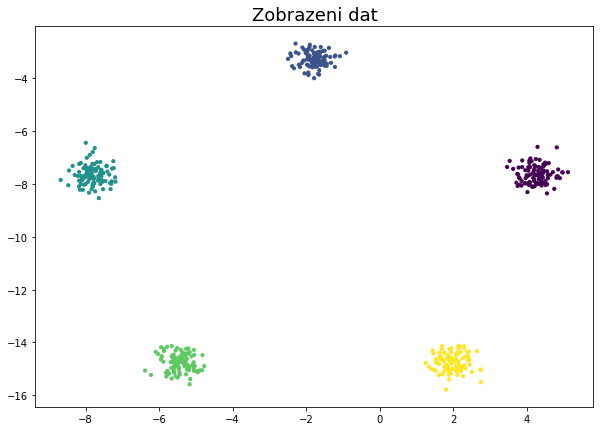

In [18]:
plotPoints(X.T, classes)

### Initialization

In [37]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [38]:
# parametry site
parameters = initialize_parameters(2, 10, 5)
#print("W1 = " + str(parameters["W1"]))
#print("b1 = " + str(parameters["b1"]))
#print("W2 = " + str(parameters["W2"]))
#print("b2 = " + str(parameters["b2"]))

print("W1.shape = " + str(parameters["W1"].shape))
print("b1.shape = " + str(parameters["b1"].shape))
print("W2.shape = " + str(parameters["W2"].shape))
print("b2.shape = " + str(parameters["b2"].shape))

W1.shape = (10, 2)
b1.shape = (10, 1)
W2.shape = (5, 10)
b2.shape = (5, 1)


### Forward Propagation

In [39]:
def tanh(x, slope):
    # POZN. - numpy ma vlastni tanh
    t = 2 / (1+np.exp(-slope*x)) - 1
    return t

In [40]:
def forward_propagation(X, parameters, slope):
    """
    Argument:
    X - input data of size (n_x, m)
    parameters - python dictionary containing parameters
    
    Returns:
    A2 - The output of neural network
    cache - dictionary containing "Z1", "A1", "Z2", "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1, slope)
    Z2 = np.dot(W2, A1) + b2
    A2 = tanh(Z2, slope)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [41]:
A2, cache = forward_propagation(X, parameters, slope=1)

In [42]:
print(A2.shape)
print(A2[:,250])

(5, 500)
[-1.13033528e-03  2.37311206e-04  2.95701391e-04  7.91782972e-04
 -5.51694929e-05]


### Compute Cost

In [43]:
def compute_cost(A, Y):
    """
    Argument:
    A - output of neural network
    Y - correct label
    
    Returns:
    E - error across all training examples
    """
    
    cost_vec = np.zeros((Y.shape[1],1))
    
    for i in range(Y.shape[1]):
        cost_vec[i,0] = np.dot((Y-A)[:,i], (Y-A)[:,i].T)
    
    #print(cost_vec.shape)
    summed_cost = np.sum(cost_vec, axis=0)
    #print(summed_cost)
    
    E = 1/2 * summed_cost[0]
    
    return E

In [44]:
E = compute_cost(A2, Y)
print(E)

1249.5273675460485


### Backward propagation

In [218]:
def backward_propagation(X, Y, parameters, cache):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = (Y - A2) * (1 - np.power(
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * (np.sum(dZ2,axis=1,keepdims=True))
        
    grads = # dictionary
    
    return dW, db

In [215]:
print(W)
dW, db = backward_propagation(A, Y, X)
print(dW)

[[ 0.00891346 -0.02039106]
 [ 0.02240985  0.00357724]
 [ 0.00416295  0.02135069]
 [-0.01862887  0.01267783]
 [-0.01597693 -0.01462234]]
[[ 0.00718844  0.0563876 ]
 [-0.01290369  0.05038874]
 [ 0.00325108 -0.04571213]
 [-0.17328662 -0.34652974]
 [ 0.06238903  0.03397149]]


### Update parameters

In [216]:
def update_parameters(W, b, dW, db, learning_rate):
    W = W + learning_rate * dW
    b = b + learning_rate * db
    return W, b

In [217]:
learning_rate = 0.1
W, b = update_parameters(W, b, dW, db, learning_rate)
print(b.shape)

(5, 1)


## Model

In [229]:
def nn_model(X, Y, learning_rate, num_iterations, print_cost):
    
    W, b = initialize_parameters(2,5)
    print("Initial weight matrix \n" + str(W) + "\n")
    print("Initial bias vector \n" + str(b) + "\n")
    
    for i in range(0, num_iterations):
        A = forward_propagation(X, W, b)
        cost = compute_cost(A, Y)
        dW, db = backward_propagation(A, Y, X)
        W, b = update_parameters(W, b, dW, db, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        if cost < 250:
            print("Neural network has been trained after %i iterations \n" %i)
            break;
            
    print("Trained weight matrix \n" + str(W) + "\n")
    print("Trained bias vector \n" + str(b) + "\n")
    
    return W,b

In [230]:
W,b = nn_model(X, Y, learning_rate=0.01, num_iterations=1000, print_cost=True)

Initial weight matrix 
[[ 0.00216103 -0.00231899]
 [ 0.00636981 -0.01200311]
 [ 0.01850481 -0.00955236]
 [-0.01803759 -0.00036754]
 [-0.01512319 -0.0073498 ]]

Initial bias vector 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Cost after iteration 0: 1828.000000
Neural network has been trained after 56 iterations 

Trained weight matrix 
[[ 0.00909926 -0.01945463]
 [ 0.02244929  0.00396603]
 [ 0.00456626  0.02073432]
 [-0.01879477  0.01306927]
 [-0.01560742 -0.01455421]]

Trained bias vector 
[[-0.14708]
 [-0.14712]
 [-0.11224]
 [-0.11468]
 [-0.1332 ]]



In [232]:
A = forward_propagation(X, W, b)
print(A[:,220])
print(Y[:,220])

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]


## Klasifikace rastru

In [233]:
def createraster(X, pointsinrow):
    boundary = [np.amax(X[1, :]) + 0.2, np.amax(X[0, :]) + 0.2, np.amin(X[1, :]) - 0.2, np.amin(X[0, :]) - 0.2]  # clockwise
    
    print(np.amax(X[1, :]))
    print(np.amax(X[0, :]))
    print(np.amin(X[1, :]))
    print(np.amin(X[0, :]))
    
    top, right, bottom, left = boundary
    columnpoints = top - bottom
    raster = np.linspace([left, top], [right, top], pointsinrow)
    top -= columnpoints / pointsinrow

    while top >= bottom:
        raster_row = np.linspace([left, top], [right, top], pointsinrow)
        raster = np.concatenate((raster, raster_row), axis=0)
        top -= columnpoints / pointsinrow

    plt.show()

    return raster

In [234]:
pointsinrow = 200  # points in 1 row
raster = createraster(X, pointsinrow)

12.409329
13.435873
-14.29898
-11.071743


In [235]:
raster_classified = forward_propagation(raster.T, W, b)

In [236]:
raster_classes = []
points_with_class = []
points_without_class = []
for i in range(raster_classified.shape[1]):
    
    column = raster_classified[:,i]
    column_sum = np.sum(column)
    
    if column_sum == -3:
        raster_classes.append(np.squeeze(np.where(column == 1)))
        points_with_class.append(raster[i])

## Vykresleni oklasifikovaneho rastru

In [237]:
def plotPoints2(X, classes, Y, classes2):
    X = np.array(X)
    Y = np.array(Y)
    classes = np.array(classes)
    classes2 = np.array(classes2)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(Y[:, 0], Y[:, 1], s=10, c=classes2)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=classes) # nebo sem dat 'salmon'
    plt.title("Zobrazeni dat", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.show()

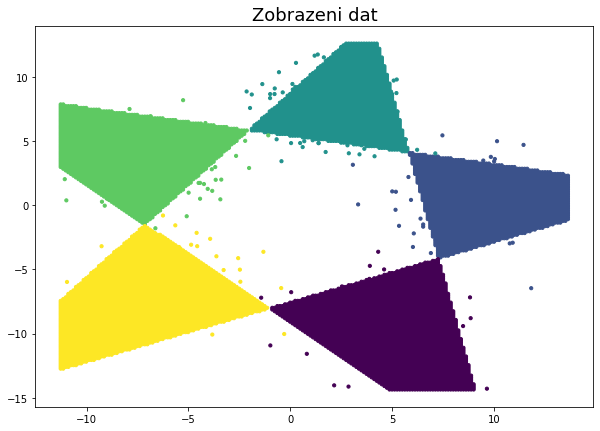

In [238]:
#plotPoints(points_with_class, raster_classes)
#plotPoints(X.T, classes)
plotPoints2(X.T, classes, points_with_class, raster_classes)